In [1]:
import numpy as np
import pandas as pd

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df_full = pd.read_csv('kag_risk_factors_cervical_cancer.csv')

In [4]:
df_full

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,...,?,?,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,0,0


In [5]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [6]:
df_fullna = df_full.replace('?', np.nan)

In [7]:
df_fullna.isnull().sum() #check NaN counts in different columns

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

# 2. Data-preprocessing

In [8]:
df = df_fullna  #making temporary save

In [9]:
df = df._convert(numeric=True) #turn data into numeric type for computation

In [10]:
df.info() # Now it's all numeric type, and we are ready for computation and fill NaN.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           832 non-null    float64
 2   First sexual intercourse            851 non-null    float64
 3   Num of pregnancies                  802 non-null    float64
 4   Smokes                              845 non-null    float64
 5   Smokes (years)                      845 non-null    float64
 6   Smokes (packs/year)                 845 non-null    float64
 7   Hormonal Contraceptives             750 non-null    float64
 8   Hormonal Contraceptives (years)     750 non-null    float64
 9   IUD                                 741 non-null    float64
 10  IUD (years)                         741 non-null    float64
 11  STDs                                753 non-n

In [11]:
# for continuous variable
df['Number of sexual partners'] = df['Number of sexual partners'].fillna(df['Number of sexual partners'].median())
df['First sexual intercourse'] = df['First sexual intercourse'].fillna(df['First sexual intercourse'].median())
df['Num of pregnancies'] = df['Num of pregnancies'].fillna(df['Num of pregnancies'].median())
df['Smokes'] = df['Smokes'].fillna(1)
df['Smokes (years)'] = df['Smokes (years)'].fillna(df['Smokes (years)'].median())
df['Smokes (packs/year)'] = df['Smokes (packs/year)'].fillna(df['Smokes (packs/year)'].median())
df['Hormonal Contraceptives'] = df['Hormonal Contraceptives'].fillna(1)
df['Hormonal Contraceptives (years)'] = df['Hormonal Contraceptives (years)'].fillna(df['Hormonal Contraceptives (years)'].median())
df['IUD'] = df['IUD'].fillna(0) # Under suggestion
df['IUD (years)'] = df['IUD (years)'].fillna(0) #Under suggestion
df['STDs'] = df['STDs'].fillna(1)
df['STDs (number)'] = df['STDs (number)'].fillna(df['STDs (number)'].median())
df['STDs:condylomatosis'] = df['STDs:condylomatosis'].fillna(df['STDs:condylomatosis'].median())
df['STDs:cervical condylomatosis'] = df['STDs:cervical condylomatosis'].fillna(df['STDs:cervical condylomatosis'].median())
df['STDs:vaginal condylomatosis'] = df['STDs:vaginal condylomatosis'].fillna(df['STDs:vaginal condylomatosis'].median())
df['STDs:vulvo-perineal condylomatosis'] = df['STDs:vulvo-perineal condylomatosis'].fillna(df['STDs:vulvo-perineal condylomatosis'].median())
df['STDs:syphilis'] = df['STDs:syphilis'].fillna(df['STDs:syphilis'].median())
df['STDs:pelvic inflammatory disease'] = df['STDs:pelvic inflammatory disease'].fillna(df['STDs:pelvic inflammatory disease'].median())
df['STDs:genital herpes'] = df['STDs:genital herpes'].fillna(df['STDs:genital herpes'].median())
df['STDs:molluscum contagiosum'] = df['STDs:molluscum contagiosum'].fillna(df['STDs:molluscum contagiosum'].median())
df['STDs:AIDS'] = df['STDs:AIDS'].fillna(df['STDs:AIDS'].median())
df['STDs:HIV'] = df['STDs:HIV'].fillna(df['STDs:HIV'].median())
df['STDs:Hepatitis B'] = df['STDs:Hepatitis B'].fillna(df['STDs:Hepatitis B'].median())
df['STDs:HPV'] = df['STDs:HPV'].fillna(df['STDs:HPV'].median())
df['STDs: Time since first diagnosis'] = df['STDs: Time since first diagnosis'].fillna(df['STDs: Time since first diagnosis'].median())
df['STDs: Time since last diagnosis'] = df['STDs: Time since last diagnosis'].fillna(df['STDs: Time since last diagnosis'].median())

In [12]:
# for categorical variable
df = pd.get_dummies(data=df, columns=['Smokes','Hormonal Contraceptives','IUD','STDs',
                                      'Dx:Cancer','Dx:CIN','Dx:HPV','Dx','Hinselmann','Citology','Schiller'])

In [13]:
df.isnull().sum() #No null left~

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives (years)       0
IUD (years)                           0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0
STDs: Number of diagnosis             0
STDs: Time since first diagnosis      0
STDs: Time since last diagnosis       0
Biopsy                                0


In [14]:
df 

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),STDs (number),STDs:condylomatosis,...,Dx:HPV_0,Dx:HPV_1,Dx_0,Dx_1,Hinselmann_0,Hinselmann_1,Citology_0,Citology_1,Schiller_0,Schiller_1
0,18,4.0,15.0,1.0,0.0,0.0,0.00,0.0,0.0,0.0,...,1,0,1,0,1,0,1,0,1,0
1,15,1.0,14.0,1.0,0.0,0.0,0.00,0.0,0.0,0.0,...,1,0,1,0,1,0,1,0,1,0
2,34,1.0,17.0,1.0,0.0,0.0,0.00,0.0,0.0,0.0,...,1,0,1,0,1,0,1,0,1,0
3,52,5.0,16.0,4.0,37.0,37.0,3.00,0.0,0.0,0.0,...,0,1,1,0,1,0,1,0,1,0
4,46,3.0,21.0,4.0,0.0,0.0,15.00,0.0,0.0,0.0,...,1,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,1,0,1,0,1,0,1,0,1,0
854,32,2.0,19.0,1.0,0.0,0.0,8.00,0.0,0.0,0.0,...,1,0,1,0,1,0,1,0,1,0
855,25,2.0,17.0,0.0,0.0,0.0,0.08,0.0,0.0,0.0,...,1,0,1,0,1,0,0,1,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.08,0.0,0.0,0.0,...,1,0,1,0,1,0,1,0,1,0


Now, we have full data 'df' for computation.<br/>
We are ready for spliting data into train/test set, defining features and labels, and normalization.

In [15]:
df_data = df #making temporary save

## Quick check for value range (especially when doing regression)

In [16]:
df.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),STDs (number),STDs:condylomatosis,...,Dx:HPV_0,Dx:HPV_1,Dx_0,Dx_1,Hinselmann_0,Hinselmann_1,Citology_0,Citology_1,Schiller_0,Schiller_1
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,...,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.511655,16.995338,2.257576,1.201241,0.446278,2.035331,0.444604,0.155012,0.051282,...,0.979021,0.020979,0.972028,0.027972,0.959207,0.040793,0.948718,0.051282,0.913753,0.086247
std,8.497948,1.644759,2.791883,1.400981,4.060623,2.210351,3.567040,1.814218,0.529617,0.220701,...,0.143398,0.143398,0.164989,0.164989,0.197925,0.197925,0.220701,0.220701,0.280892,0.280892
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,37.000000,37.000000,30.000000,19.000000,4.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:xlabel='STDs (number)', ylabel='count'>

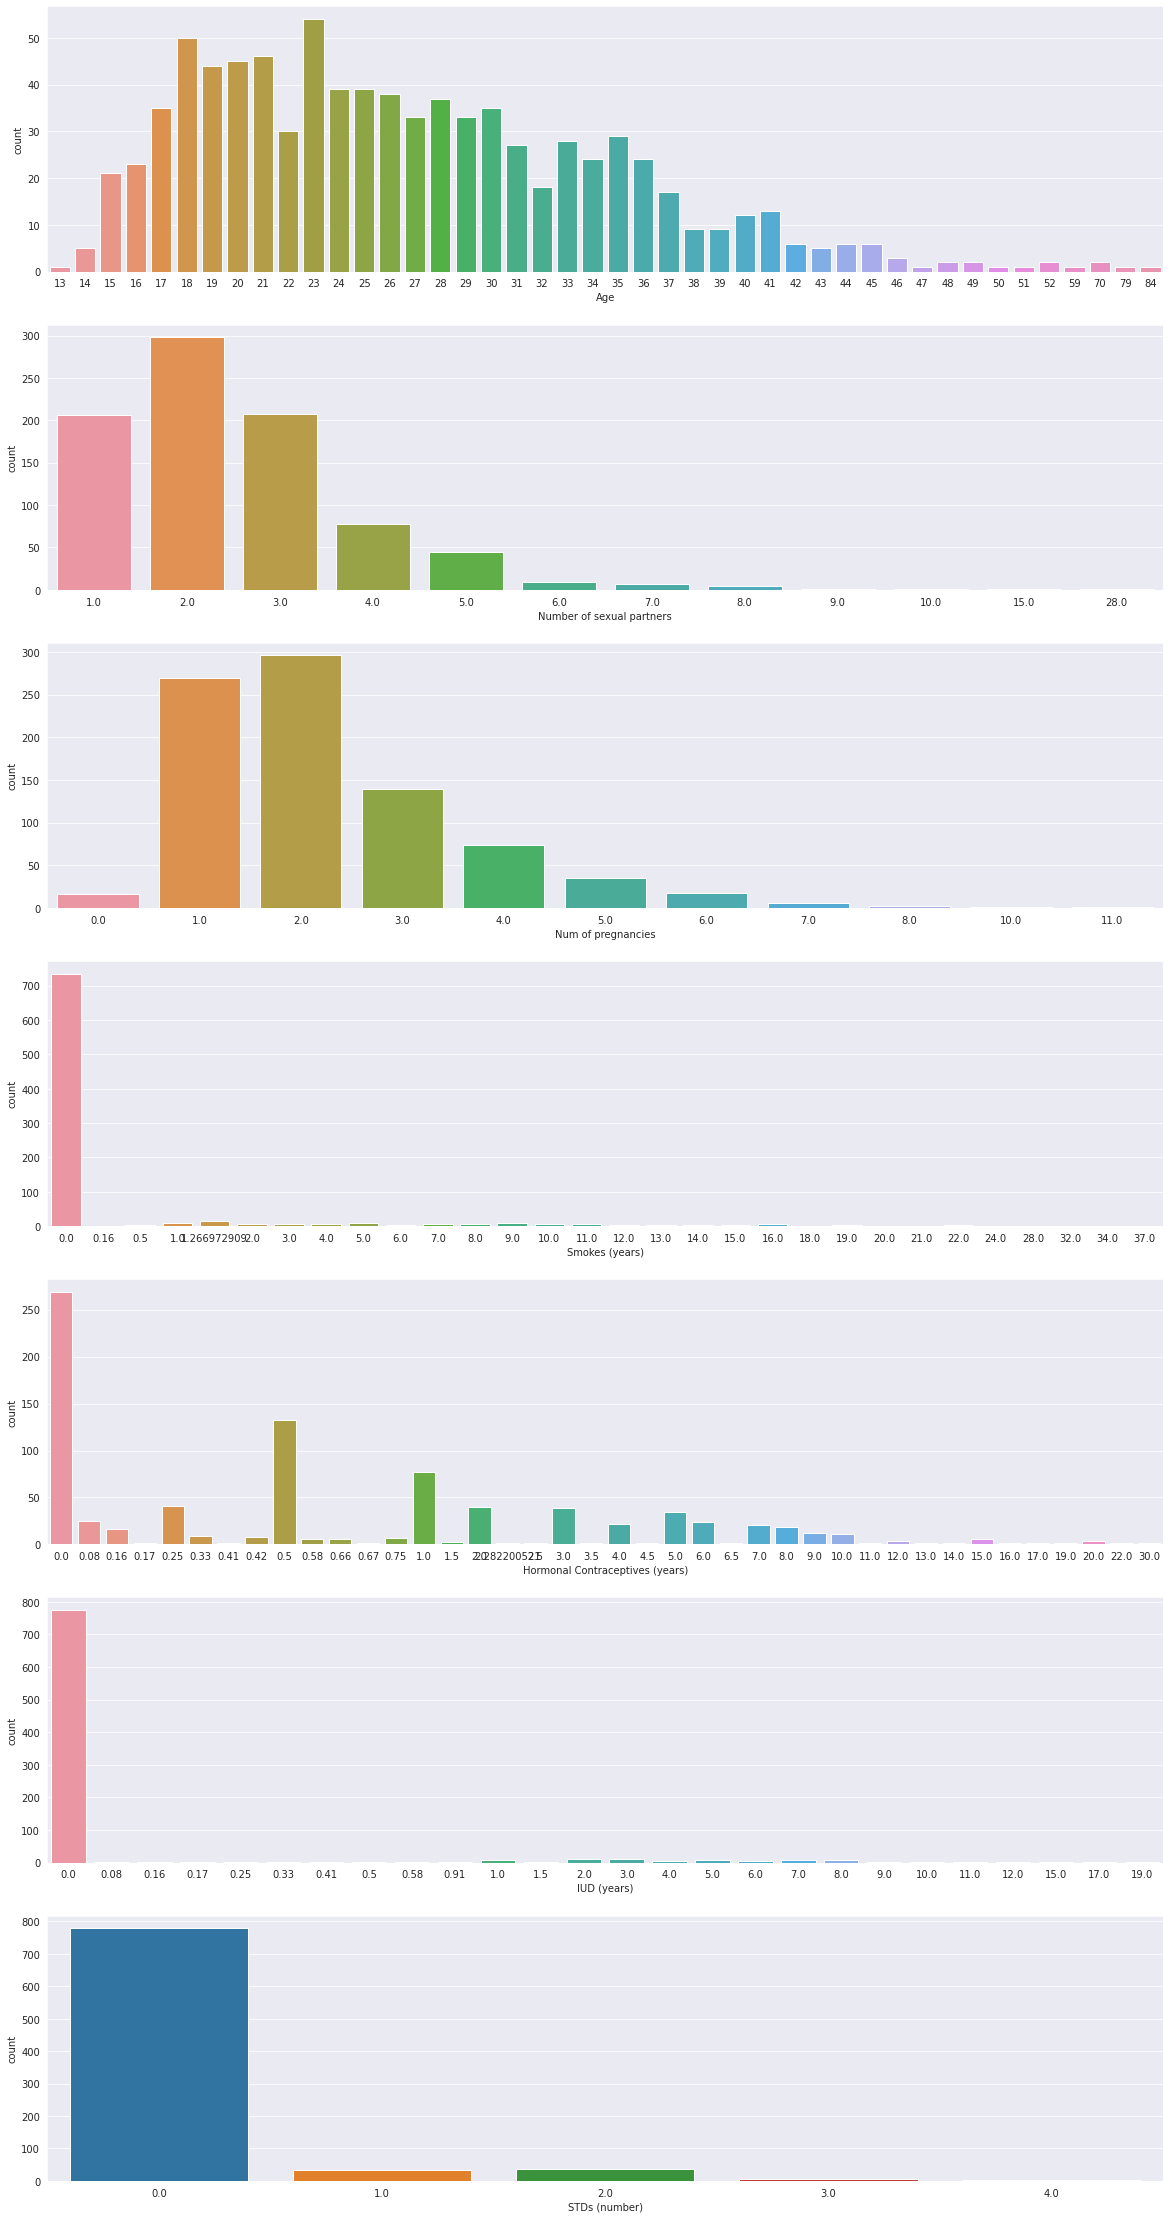

In [17]:
fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7) = plt.subplots(7,1,figsize=(20,40))
sns.countplot(x='Age', data=df, ax=ax1)
sns.countplot(x='Number of sexual partners', data=df, ax=ax2)
sns.countplot(x='Num of pregnancies', data=df, ax=ax3)
sns.countplot(x='Smokes (years)', data=df, ax=ax4)
sns.countplot(x='Hormonal Contraceptives (years)', data=df, ax=ax5)
sns.countplot(x='IUD (years)', data=df, ax=ax6)
sns.countplot(x='STDs (number)', data=df, ax=ax7)

## Shuffle the data, and split them into train set and test set.

In [34]:
#KFOLD = 5
from sklearn.model_selection import KFold
kf=KFold(n_splits=5)
kfold_array_train=[]
kfold_array_test=[]
for train_index, test_index in kf.split(df_data.index):
    kfold_array_train.append(df_data.loc[train_index,:])
    kfold_array_test.append(df_data.loc[test_index,:]) 

## Defining features and labels

[0.22535211 0.03703704 0.36842105 0.18181818 0.         0.
 0.3        0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.14285714 0.0952381
 1.         0.         0.         1.         1.         0.
 1.         0.         1.         0.         1.         0.
 1.         0.         1.         0.         1.         0.
 1.         0.         1.         0.        ]
0
[0.08108108 0.5        0.22727273 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.15       0.1
 1.         0.         1.         0.         1.         0.
 1.         0.         1.         0.         1.         0.
 1.         0.         1.         0.         1.         0.
 1.         0.         1.         0.        ]
0
Model: "sequential"
__________________________________________________

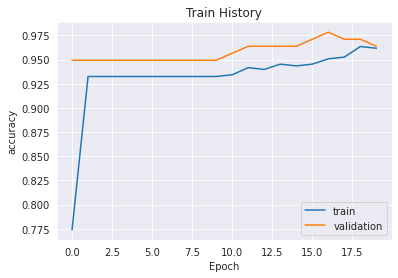

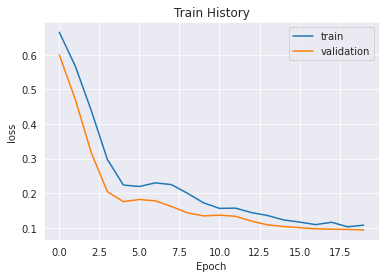

model saved to disk
6/6 [==============================] - 0s 849us/step - loss: 0.0995 - accuracy: 0.9651


accuracy= 0.9651162624359131
total test case number:  172
total_num:  172
G1P1:  0
G0P1:  0
G1P0:  11
G0P0:  161
##########################
sensitivity:  0.0
specificity:  0.936046511627907
false_positive_rate:  0.0
false_negative_rate:  1.0
[0.07042254 0.11111111 0.22727273 0.09090909 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.14285714 0.0952381
 1.         0.         1.         0.         1.         0.
 1.         0.         1.         0.         1.         0.
 1.         0.         1.         0.         1.         0.
 1.         0.         1.         0.        ]
0
[0.34482759 0.07142857 0.28571429 0.16666667 0.         0.
 1.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0. 

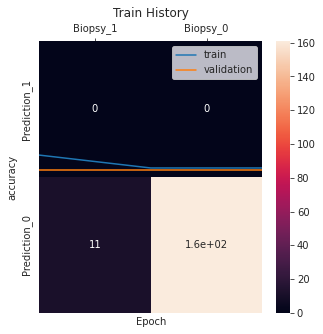

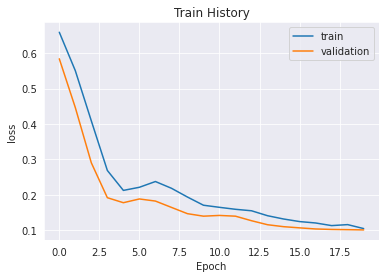

model saved to disk
6/6 [==============================] - 0s 969us/step - loss: 0.0981 - accuracy: 0.9767


accuracy= 0.9767441749572754
total test case number:  172
total_num:  172
G1P1:  0
G0P1:  0
G1P0:  12
G0P0:  160
##########################
sensitivity:  0.0
specificity:  0.9302325581395349
false_positive_rate:  0.0
false_negative_rate:  1.0
[0.07042254 0.21428571 0.22727273 0.09090909 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.15       0.1
 1.         0.         1.         0.         1.         0.
 1.         0.         1.         0.         1.         0.
 1.         0.         1.         0.         1.         0.
 1.         0.         1.         0.        ]
0
[0.12903226 0.         0.36842105 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.      

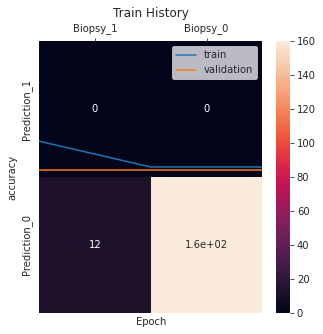

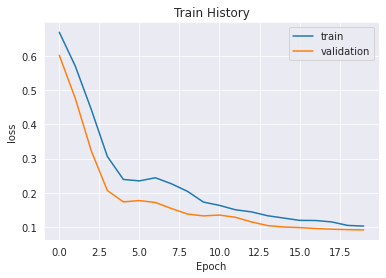

model saved to disk
6/6 [==============================] - 0s 773us/step - loss: 0.1134 - accuracy: 0.9535


accuracy= 0.9534883499145508
total test case number:  172
total_num:  172
G1P1:  0
G0P1:  0
G1P0:  8
G0P0:  164
##########################
sensitivity:  0.0
specificity:  0.9534883720930233
false_positive_rate:  0.0
false_negative_rate:  1.0
[0.10526316 0.11111111 0.22727273 0.125      0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.14285714 0.0952381
 1.         0.         1.         0.         1.         0.
 1.         0.         1.         0.         1.         0.
 1.         0.         1.         0.         1.         0.
 1.         0.         1.         0.        ]
0
[0.09859155 0.2        0.23529412 0.09090909 0.         0.
 0.05       0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0. 

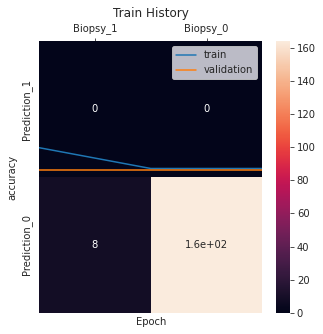

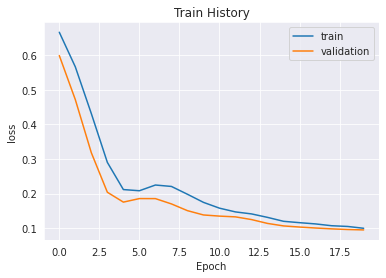

model saved to disk
6/6 [==============================] - 0s 775us/step - loss: 0.1450 - accuracy: 0.9415


accuracy= 0.9415204524993896
total test case number:  171
total_num:  171
G1P1:  0
G0P1:  0
G1P0:  14
G0P0:  157
##########################
sensitivity:  0.0
specificity:  0.9181286549707602
false_positive_rate:  0.0
false_negative_rate:  1.0
[0.07042254 0.11111111 0.22727273 0.09090909 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.14285714 0.0952381
 1.         0.         1.         0.         1.         0.
 1.         0.         1.         0.         1.         0.
 1.         0.         1.         0.         1.         0.
 1.         0.         1.         0.        ]
0
[0.63333333 0.25       0.26666667 0.57142857 0.5        0.11666667
 0.03333333 0.         0.33333333 0.         0.         0.
 0.         0.         0.         0.         0.       

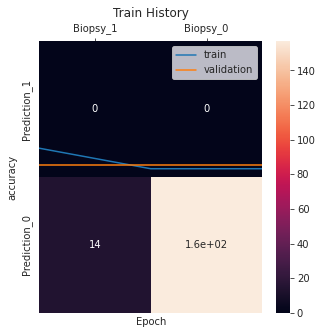

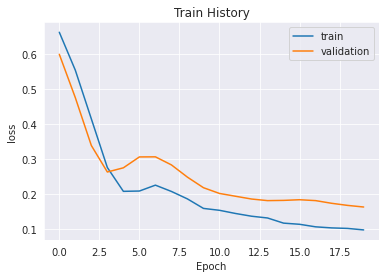

model saved to disk
6/6 [==============================] - 0s 8ms/step - loss: 0.1012 - accuracy: 0.9649


accuracy= 0.9649122953414917
total test case number:  171
total_num:  171
G1P1:  0
G0P1:  0
G1P0:  10
G0P0:  161
##########################
sensitivity:  0.0
specificity:  0.9415204678362573
false_positive_rate:  0.0
false_negative_rate:  1.0
FINAL ACCURCY = 0.9603563070297241


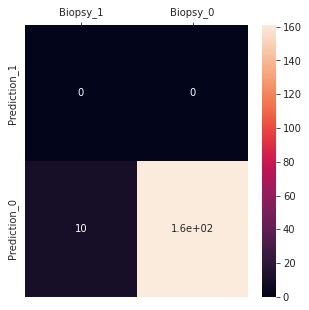

In [19]:
#分類feature/label
from sklearn import preprocessing
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
sum_accuracy=0
for fold in range(5):
    df_train_feature = kfold_array_train[fold][['Age', 'Number of sexual partners', 'First sexual intercourse',
           'Num of pregnancies', 'Smokes (years)', 'Smokes (packs/year)',
           'Hormonal Contraceptives (years)', 'IUD (years)', 'STDs (number)',
           'STDs:condylomatosis', 'STDs:cervical condylomatosis',
           'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis',
           'STDs:syphilis', 'STDs:pelvic inflammatory disease',
           'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS',
           'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
           'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis', 
           'Smokes_0.0', 'Smokes_1.0',
           'Hormonal Contraceptives_0.0', 'Hormonal Contraceptives_1.0', 'IUD_0.0',
           'IUD_1.0', 'STDs_0.0', 'STDs_1.0', 'Dx:Cancer_0', 'Dx:Cancer_1',
           'Dx:CIN_0', 'Dx:CIN_1', 'Dx:HPV_0', 'Dx:HPV_1', 'Dx_0', 'Dx_1',
           'Hinselmann_0', 'Hinselmann_1', 'Citology_0', 'Citology_1','Schiller_0','Schiller_1']]

    train_label = np.array(kfold_array_train[fold]['Biopsy'])

    df_test_feature = kfold_array_test[fold][['Age', 'Number of sexual partners', 'First sexual intercourse',
           'Num of pregnancies', 'Smokes (years)', 'Smokes (packs/year)',
           'Hormonal Contraceptives (years)', 'IUD (years)', 'STDs (number)',
           'STDs:condylomatosis', 'STDs:cervical condylomatosis',
           'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis',
           'STDs:syphilis', 'STDs:pelvic inflammatory disease',
           'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS',
           'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
           'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis', 
           'Smokes_0.0', 'Smokes_1.0',
           'Hormonal Contraceptives_0.0', 'Hormonal Contraceptives_1.0', 'IUD_0.0',
           'IUD_1.0', 'STDs_0.0', 'STDs_1.0', 'Dx:Cancer_0', 'Dx:Cancer_1',
           'Dx:CIN_0', 'Dx:CIN_1', 'Dx:HPV_0', 'Dx:HPV_1', 'Dx_0', 'Dx_1',
           'Hinselmann_0', 'Hinselmann_1', 'Citology_0', 'Citology_1','Schiller_0','Schiller_1']]

    test_label = np.array(kfold_array_test[fold]['Biopsy'])
    
    #Normalization
    minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
    train_feature = minmax_scale.fit_transform(df_train_feature)
    test_feature = minmax_scale.fit_transform(df_test_feature)
    
    print(train_feature[0])
    print(train_label[0])
    print(test_feature[0])
    print(test_label[0])
    
    train_feature.shape
    
    def show_train_history(train_history,train,validation):
        plt.plot(train_history.history[train])
        plt.plot(train_history.history[validation])
        plt.title('Train History')
        plt.ylabel(train)
        plt.xlabel('Epoch')
        plt.legend(['train', 'validation'], loc='best')
        plt.show()
    
    model = Sequential() 

    #Input layer
    model.add(Dense(units=500, 
                    input_dim=46, 
                    kernel_initializer='uniform', 
                    activation='relu'))
    model.add(Dropout(0.5))

    #Hidden layer 1
    model.add(Dense(units=200,  
                    kernel_initializer='uniform', 
                    activation='relu'))
    model.add(Dropout(0.5))

    #Output layer
    model.add(Dense(units=1,
                    kernel_initializer='uniform', 
                    activation='sigmoid'))

    print(model.summary()) #for showing the structure and parameters

    # Defining how to measure performance
    model.compile(loss='binary_crossentropy',   
                  optimizer='adam', metrics=['accuracy'])
    
    # Train the model
    # Verbose=2, showing loss and accuracy change timely
    train_history = model.fit(x=train_feature, y=train_label,  
                              validation_split=0.2, epochs=20, 
                              batch_size=200, verbose=2) 

    #visualize the loss and accuracy after each epoch
    show_train_history(train_history,'accuracy','val_accuracy')
    show_train_history(train_history,'loss','val_loss')

    #For saving weights
    model.save_weights(f'outputs/fold_{fold}')
    print('model saved to disk')
    
    scores = model.evaluate(test_feature, test_label)
    print('\n')
    print('accuracy=',scores[1])
    sum_accuracy+=scores[1]
    
    # Answer sheet
    prediction = np.argmax(model.predict(test_feature),axis=1)
    
    # Create a dataframe for prediction and correct answer
    df_ans = pd.DataFrame({'Biopsy' :test_label})
    df_ans['Prediction'] = prediction
    
    df_ans[ df_ans['Biopsy'] != df_ans['Prediction'] ] 
    df_ans['Prediction'].value_counts()
    df_ans['Biopsy'].value_counts()
    
    cols = ['Biopsy_1','Biopsy_0']  #Gold standard
    rows = ['Prediction_1','Prediction_0'] #diagnostic tool (our prediction)

    B1P1 = len(df_ans[(df_ans['Prediction'] == df_ans['Biopsy']) & (df_ans['Biopsy'] == 1)])
    B1P0 = len(df_ans[(df_ans['Prediction'] != df_ans['Biopsy']) & (df_ans['Biopsy'] == 1)])
    B0P1 = len(df_ans[(df_ans['Prediction'] != df_ans['Biopsy']) & (df_ans['Biopsy'] == 0)])
    B0P0 = len(df_ans[(df_ans['Prediction'] == df_ans['Biopsy']) & (df_ans['Biopsy'] == 0)])

    conf = np.array([[B1P1,B0P1],[B1P0,B0P0]])
    df_cm = pd.DataFrame(conf, columns = [i for i in cols], index = [i for i in rows])

    f, ax= plt.subplots(figsize = (5, 5))
    sns.heatmap(df_cm, annot=True, ax=ax) 
    ax.xaxis.set_ticks_position('top') #Making x label be on top is common in textbooks.

    print('total test case number: ', np.sum(conf))
    
    def model_efficacy(conf):
        total_num = np.sum(conf)
        sen = conf[0][0]/(conf[0][0]+conf[1][0])
        spe = conf[1][1]/(conf[1][0]+conf[1][1])
        false_positive_rate = conf[0][1]/(conf[0][1]+conf[1][1])
        false_negative_rate = conf[1][0]/(conf[0][0]+conf[1][0])

        print('total_num: ',total_num)
        print('G1P1: ',conf[0][0]) #G = gold standard; P = prediction
        print('G0P1: ',conf[0][1])
        print('G1P0: ',conf[1][0])
        print('G0P0: ',conf[1][1])
        print('##########################')
        print('sensitivity: ',sen)
        print('specificity: ',spe)
        print('false_positive_rate: ',false_positive_rate)
        print('false_negative_rate: ',false_negative_rate)

        return total_num, sen, spe, false_positive_rate, false_negative_rate

    model_efficacy(conf)

print('FINAL ACCURCY =',sum_accuracy/5)

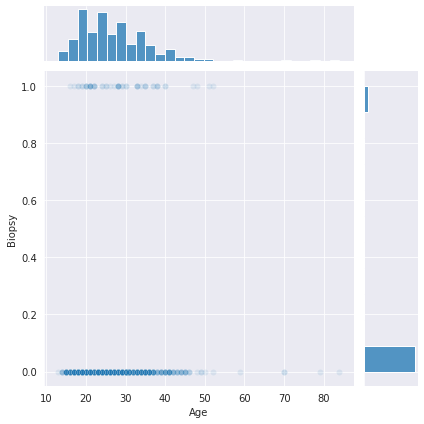

In [20]:
import seaborn as sns
sns.jointplot(x='Age', y='Biopsy', data=df, alpha=0.1) 
#By adding alpha, we can see the density of the scattered spots clearly.

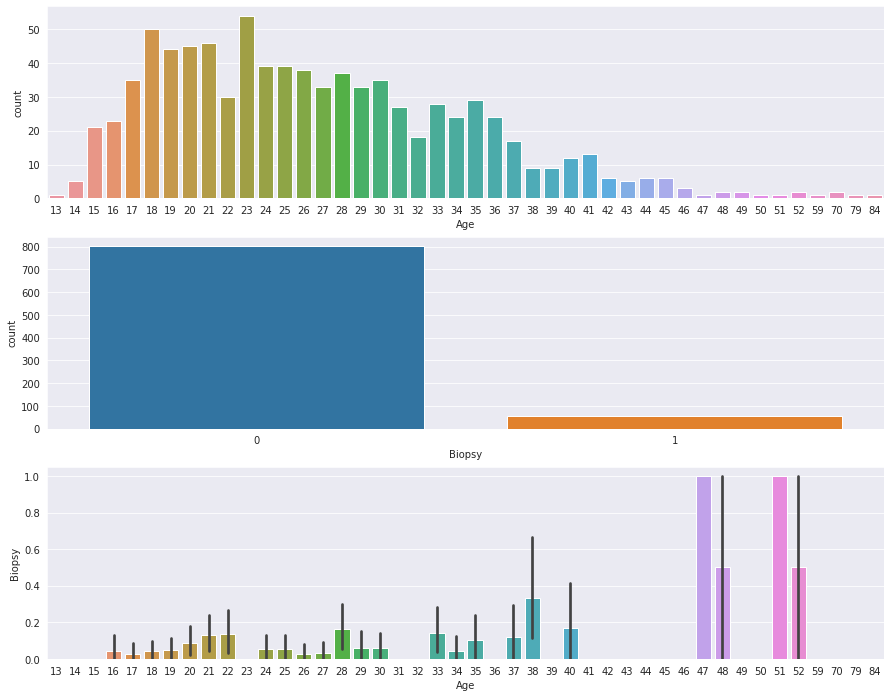

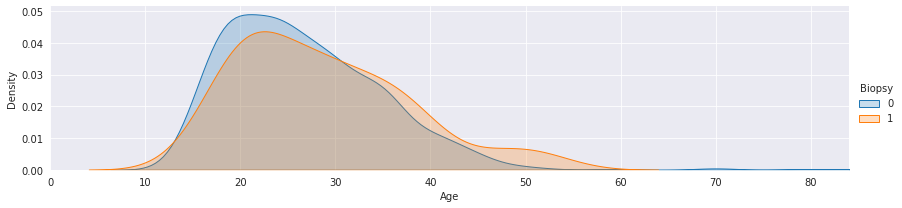

In [21]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(15,12))
sns.countplot(x='Age', data=df, ax=ax1)
sns.countplot(x='Biopsy', data=df, ax=ax2)
sns.barplot(x='Age', y='Biopsy', data=df, ax=ax3)

#Stratified
facet = sns.FacetGrid(df, hue='Biopsy',aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, df['Age'].max()))
facet.add_legend()

### Number of sexual partners

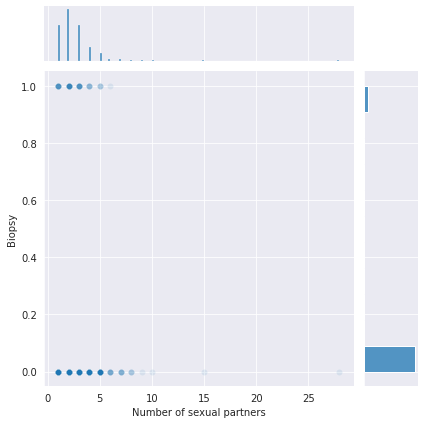

In [22]:
import seaborn as sns
sns.jointplot(x='Number of sexual partners', y='Biopsy', data=df, alpha=0.1) 
#By adding alpha, we can see the density of the scattered spots clearly.

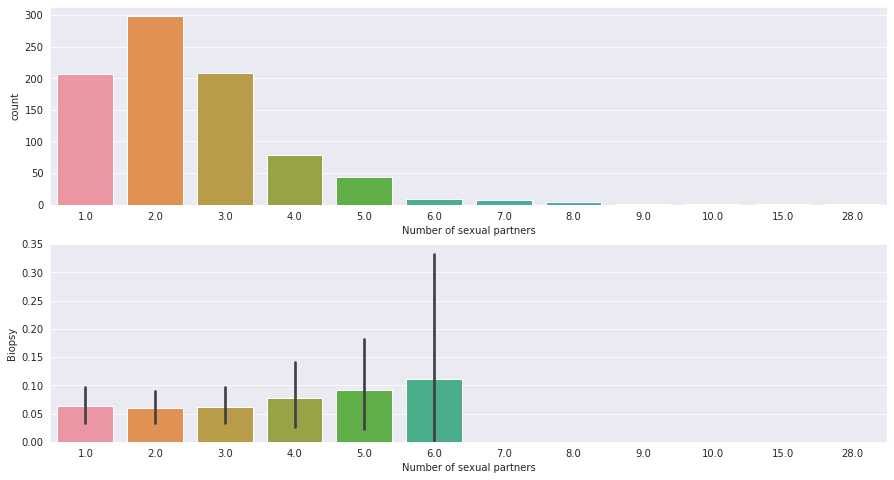

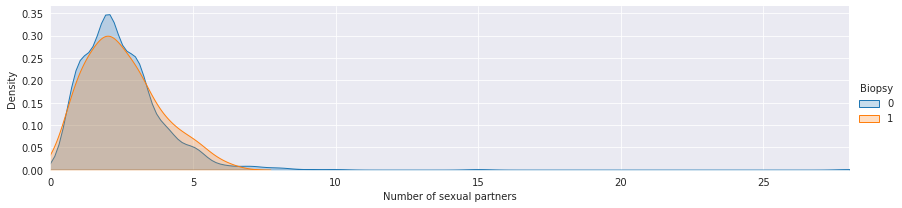

In [23]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(15,8))
sns.countplot(x='Number of sexual partners', data=df, ax=ax1)
sns.barplot(x='Number of sexual partners', y='Biopsy', data=df, ax=ax2) #categorical to categorical

#continuous to categorical
facet = sns.FacetGrid(df, hue='Biopsy',aspect=4)
facet.map(sns.kdeplot,'Number of sexual partners',shade= True)
facet.set(xlim=(0, df['Number of sexual partners'].max()))
facet.add_legend()

The people having more than 10 sexual partners got biopsy(-)...hmm...

### Num of pregnancies

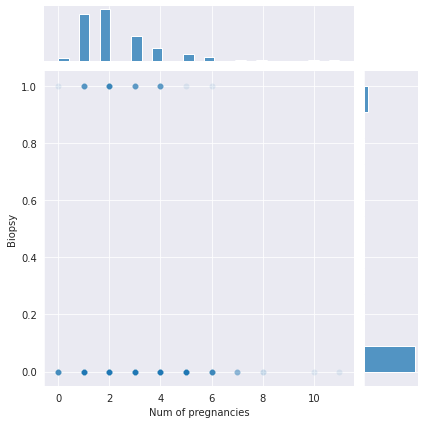

In [24]:
import seaborn as sns
sns.jointplot(x='Num of pregnancies', y='Biopsy', data=df, alpha=0.1) 

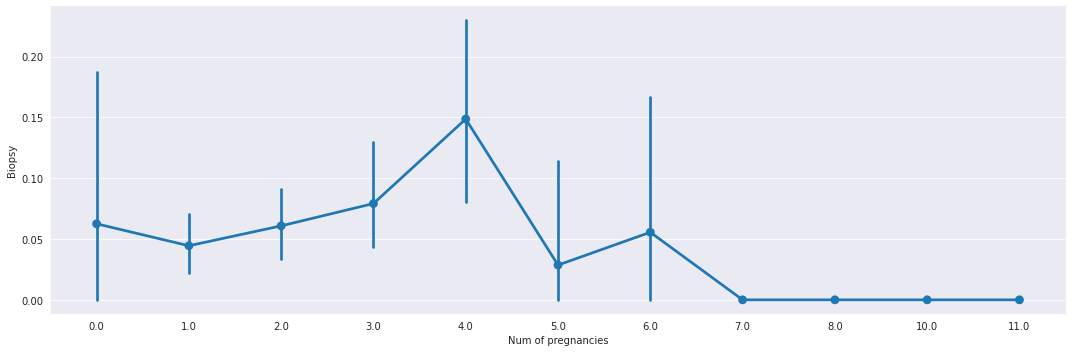

In [25]:
sns.factorplot('Num of pregnancies','Biopsy',data=df, size=5, aspect=3)

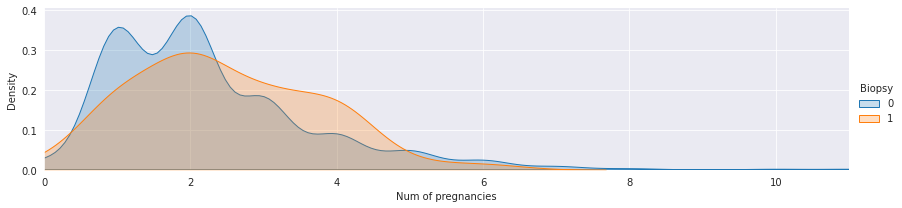

In [26]:
#continuous to categorical
facet = sns.FacetGrid(df, hue='Biopsy',aspect=4)
facet.map(sns.kdeplot,'Num of pregnancies',shade= True)
facet.set(xlim=(0, df['Num of pregnancies'].max()))
facet.add_legend()

### Cytology

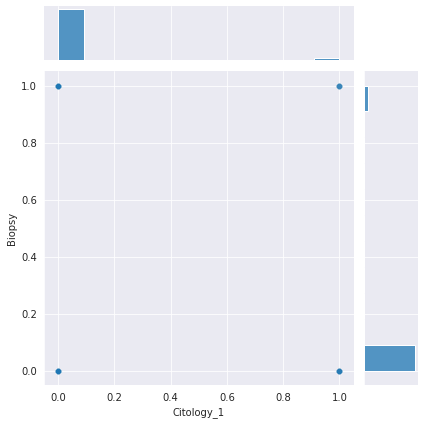

In [27]:
import seaborn as sns
sns.jointplot(x='Citology_1', y='Biopsy', data=df, alpha=0.1) 
# Hard do see anything...

<AxesSubplot:xlabel='Citology_1', ylabel='Biopsy'>

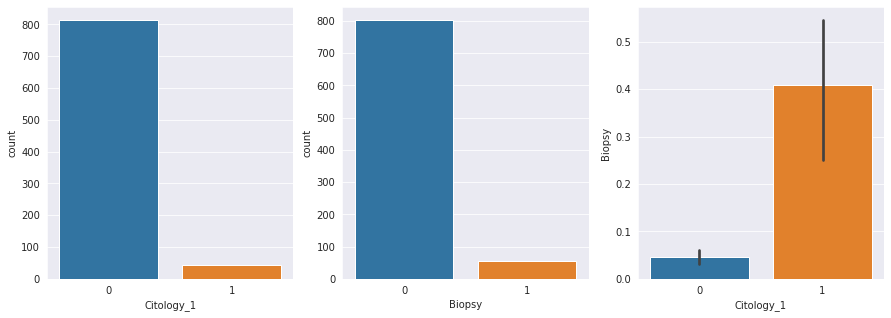

In [28]:
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5))
sns.countplot(x='Citology_1', data=df, ax=axis1)
sns.countplot(x='Biopsy', data=df, ax=axis2)
sns.barplot(x='Citology_1', y='Biopsy', data=df, ax=axis3)  #categorical to categorical

### Schiller

<AxesSubplot:xlabel='Schiller_1', ylabel='Biopsy'>

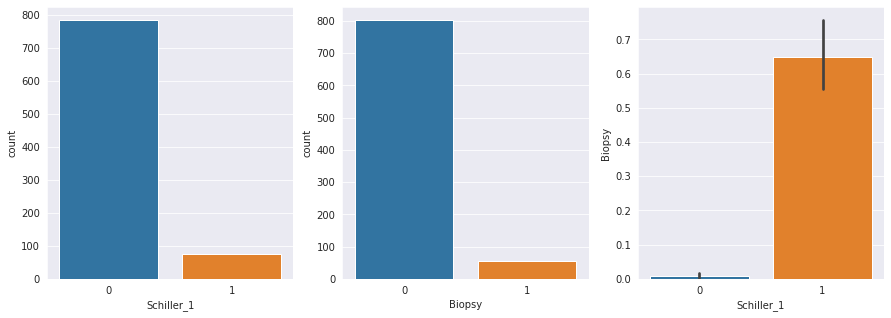

In [29]:
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5))
sns.countplot(x='Schiller_1', data=df, ax=axis1)
sns.countplot(x='Biopsy', data=df, ax=axis2)
sns.barplot(x='Schiller_1', y='Biopsy', data=df, ax=axis3) #categorical to categorical

## See the correlation between the elements (df) 

Fastest way to get contour of the data

<AxesSubplot:>

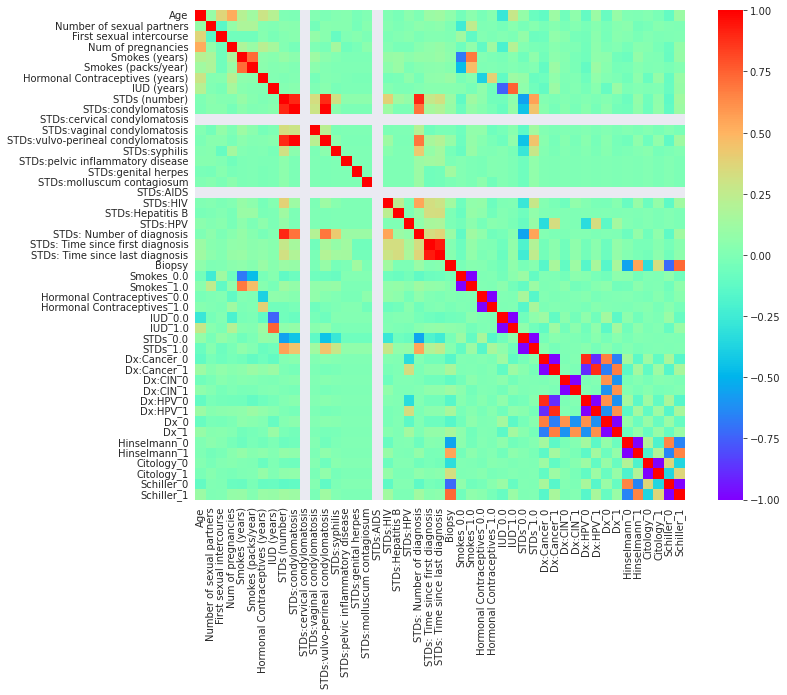

In [30]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1, square=True, cmap='rainbow')

In [31]:
df['STDs:cervical condylomatosis'].value_counts()

0.0    858
Name: STDs:cervical condylomatosis, dtype: int64

In [32]:
df['STDs:AIDS'].value_counts()

0.0    858
Name: STDs:AIDS, dtype: int64

The correlation was actually quite low.

## List the heatmap of top correlation

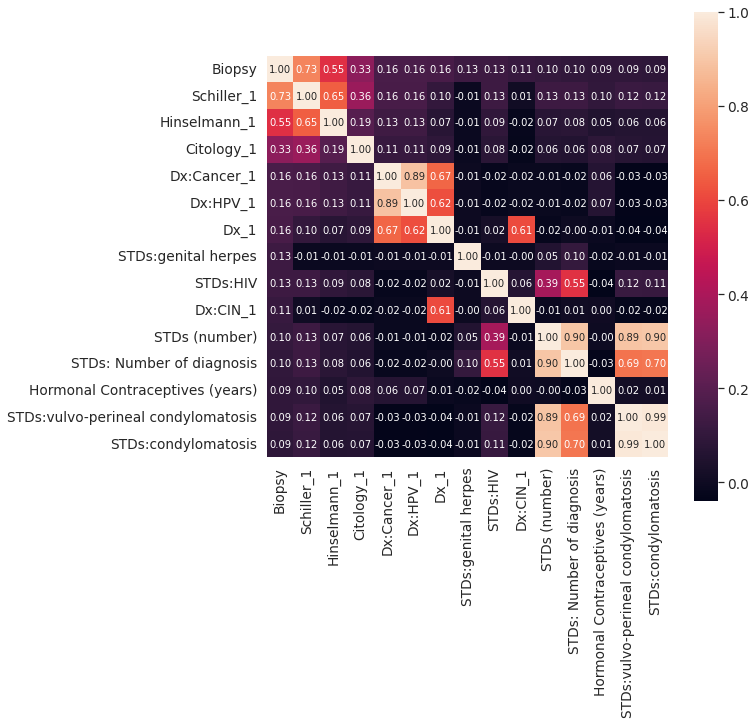

In [33]:
k = 15 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Biopsy')['Biopsy'].index
cm = np.corrcoef(df[cols].values.T)

plt.figure(figsize=(9,9)) #可以調整大小

sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
                 yticklabels = cols.values, xticklabels = cols.values)
plt.show()

## Conclusion: <br/>

It seems that 'Schiller_1', 'Hinselmann_1' and 'cytology_1' had the highest correlation with biopsy(+). <br/>
The result matched the common sense of the medical knowldege: High specificity diagnositic tool would have low false positive error. 